# Importing rasterio library

In [7]:
import rasterio

# Reading the dataset

In [11]:
ds= rasterio.open("/Users/eliekhveh/Desktop/py_scripts/raster/nepal_lc_2020.tif")
data= ds.read()
data

array([[[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]]], dtype=uint8)

# Reading Data Metadat

In [3]:
ds.meta

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': 255.0,
 'width': 2932,
 'height': 1485,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.0027777777777780012, 0.0, 80.05847091000004,
        0.0, -0.0027777777777780012, 30.472819010000357)}

In [4]:
ds.name

'/Users/eliekhveh/Desktop/py_scripts/raster/nepal_lc_2020.tif'

In [5]:
ds.shape

(1485, 2932)

In [6]:
print(data.min())
print(data.max())

10
255


# Visualization

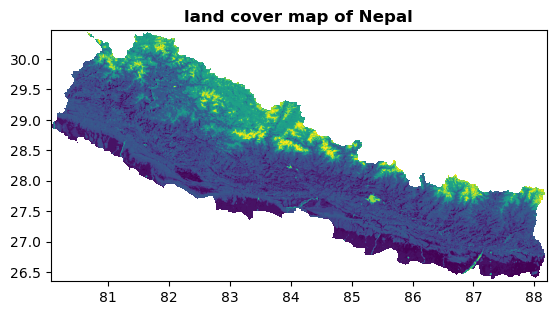

<Axes: title={'center': 'land cover map of Nepal'}>

In [22]:
from rasterio.plot import show
show(ds, title='land cover map of Nepal')

# Reclassify

In [10]:
import numpy as np
lista= data.copy()
lista[np.where((lista>=10)& (lista<=40))]= 1 #argiculture
lista[np.where((lista>=50)& (lista<=100))]= 2 #forest
lista[np.where((lista>=110)& (lista<=180))]= 3 #grassland
lista[np.where(lista>=190)]= 4 #urban
lista[np.where(lista>=200)]= 5 #bareland
lista[np.where((lista>=210)& (lista<=200))]= 6 #waterbody

array([[[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]]], dtype=uint8)

# Writing raster data


In [12]:
with rasterio.open(r"/Users/eliekhveh/Desktop/py_scripts/raster/reclassified.tiff", 'w', 
                   driver=ds.driver, 
                   height=ds.height, 
                   width=ds.width,
                    count=ds.count,
                    crs=ds.crs,
                    transform=ds.transform,
                    dtype=data.dtype)as dst:
    dst.write(data)

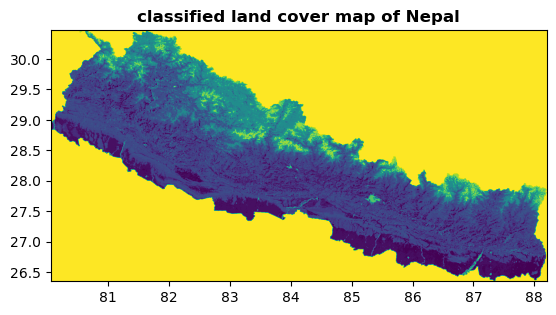

<Axes: title={'center': 'classified land cover map of Nepal'}>

In [13]:
ds_new= rasterio.open("/Users/eliekhveh/Desktop/py_scripts/raster/reclassified.tiff")
show(ds_new, title='classified land cover map of Nepal')

# Masking/clipping


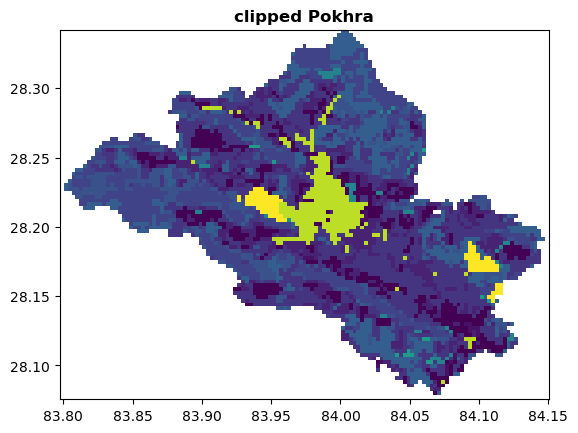

<Axes: title={'center': 'clipped Pokhra'}>

In [24]:
import fiona
#opening a vector file
with fiona.open ("/Users/eliekhveh/Desktop/py_scripts/raster/pokhara.shp", 'r') as shapefile:
    for feature in shapefile:
      shapes=[feature['geometry']]


import rasterio.mask
with rasterio.open("/Users/eliekhveh/Desktop/py_scripts/raster/nepal_lc_2020.tif") as src:
    out_image, out_transform= rasterio.mask.mask(src, shapes, crop= True )
    out_meta=src.meta


out_meta.update({
'driver': 'Gtiff',
'height':out_image.shape[1],
'width': out_image.shape[2],
'transform': out_transform
})



with rasterio.open("/Users/eliekhveh/Desktop/py_scripts/raster/pokhra_lc_2020.tif",'w', ** out_meta )as dst:
    dst.write(out_image)


dst= rasterio.open("/Users/eliekhveh/Desktop/py_scripts/raster/pokhra_lc_2020.tif")
show(dst, title='clipped Pokhra')
    
   